In [1]:
import numpy as np
import os
import tensorflow as tf
from keras import optimizers
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.layers import Convolution1D, MaxPooling1D, BatchNormalization
from keras.layers import Lambda
from keras.utils import np_utils
import h5py

Using TensorFlow backend.


In [2]:

def load_h5(h5_filename):
    f = h5py.File(h5_filename)
    data = f['data'][:]
    label = f['label'][:]
    return (data, label)


# number of points in each sample
num_points = 2048

# number of categories
k = 40


In [15]:
## get the classes
import pandas as pd
df=pd.read_csv('shape_names.txt', names=['classes'])
d=df.to_dict()

print(d.items())
furniture=[1,2,3,4,8,10,11,12,13,14,19,23,30,31,33,35,36,38]

dict_items([('classes', {0: 'airplane', 1: 'bathtub', 2: 'bed', 3: 'bench', 4: 'bookshelf', 5: 'bottle', 6: 'bowl', 7: 'car', 8: 'chair', 9: 'cone', 10: 'cup', 11: 'curtain', 12: 'desk', 13: 'door', 14: 'dresser', 15: 'flower_pot', 16: 'glass_box', 17: 'guitar', 18: 'keyboard', 19: 'lamp', 20: 'laptop', 21: 'mantel', 22: 'monitor', 23: 'night_stand', 24: 'person', 25: 'piano', 26: 'plant', 27: 'radio', 28: 'range_hood', 29: 'sink', 30: 'sofa', 31: 'stairs', 32: 'stool', 33: 'table', 34: 'tent', 35: 'toilet', 36: 'tv_stand', 37: 'vase', 38: 'wardrobe', 39: 'xbox'})])


In [17]:
d['classes']

{0: 'airplane',
 1: 'bathtub',
 2: 'bed',
 3: 'bench',
 4: 'bookshelf',
 5: 'bottle',
 6: 'bowl',
 7: 'car',
 8: 'chair',
 9: 'cone',
 10: 'cup',
 11: 'curtain',
 12: 'desk',
 13: 'door',
 14: 'dresser',
 15: 'flower_pot',
 16: 'glass_box',
 17: 'guitar',
 18: 'keyboard',
 19: 'lamp',
 20: 'laptop',
 21: 'mantel',
 22: 'monitor',
 23: 'night_stand',
 24: 'person',
 25: 'piano',
 26: 'plant',
 27: 'radio',
 28: 'range_hood',
 29: 'sink',
 30: 'sofa',
 31: 'stairs',
 32: 'stool',
 33: 'table',
 34: 'tent',
 35: 'toilet',
 36: 'tv_stand',
 37: 'vase',
 38: 'wardrobe',
 39: 'xbox'}

In [4]:
# load train points and labels

# number of points in each sample
num_points = 2048

# number of categories
k = 40
path = './'
train_path = os.path.join(path, "Prepdata")
filenames = [d for d in os.listdir(train_path)]
print(train_path)
print(filenames)
train_points = None
train_labels = None
for d in filenames:
    cur_points, cur_labels = load_h5(os.path.join(train_path, d))
    cur_points = cur_points.reshape(1, -1, 3)
    cur_labels = cur_labels.reshape(1, -1)
    if train_labels is None or train_points is None:
        train_labels = cur_labels
        train_points = cur_points
    else:
        train_labels = np.hstack((train_labels, cur_labels))
        train_points = np.hstack((train_points, cur_points))
train_points_r = train_points.reshape(-1, num_points, 3)
train_labels_r = train_labels.reshape(-1, 1)
train_points_r.shape , train_labels_r[:5]

./Prepdata
['ply_data_train0.h5', 'ply_data_train1.h5', 'ply_data_train2.h5', 'ply_data_train3.h5', 'ply_data_train4.h5']


((9840, 2048, 3), array([[30],
        [27],
        [30],
        [29],
        [22]], dtype=uint8))

In [5]:
cur_points.shape

(1, 3375104, 3)

In [6]:
import os
filenames=os.listdir('./PrepData')
train_path='./PrepData/'

cur_points, cur_labels = load_h5(train_path+'ply_data_train0.h5')

cur_points = cur_points.reshape(1, -1, 3)
cur_labels = cur_labels.reshape(1, -1)

cur_points.shape,cur_labels.shape

((1, 4194304, 3), (1, 2048))

In [7]:
cur_points[:2048,:].shape

(1, 4194304, 3)

In [18]:
cur_labels_ls=cur_labels.tolist()[0]

cur_names_labels=[n for n in cur_labels_ls ]
furniture=[1,2,3,4,8,10,11,12,13,14,19,23,30,31,33,35,36,38]
batch_points_ls=[]
batch_idxes=[]
batch_labels=[]
cur_points=cur_points.reshape(-1,3)
for i in range(len(cur_labels_ls)):
    p=cur_labels_ls[i]
    print(i,p, type(i), type(p))
    if p in furniture:
        print(i,d['classes'][p])
        idx=i*2048
        print("idx",idx)
        batch_points_ls.append(cur_points[idx:idx+2048,:])
        batch_idxes.append(i)
        batch_labels.append(d['classes'][p])
batch_points_ls=np.array(batch_points_ls)
batch_points_ls.shape

0 30 <class 'int'> <class 'int'>
0 sofa
idx 0
1 27 <class 'int'> <class 'int'>
2 30 <class 'int'> <class 'int'>
2 sofa
idx 4096
3 29 <class 'int'> <class 'int'>
4 22 <class 'int'> <class 'int'>
5 7 <class 'int'> <class 'int'>
6 28 <class 'int'> <class 'int'>
7 0 <class 'int'> <class 'int'>
8 30 <class 'int'> <class 'int'>
8 sofa
idx 16384
9 20 <class 'int'> <class 'int'>
10 28 <class 'int'> <class 'int'>
11 28 <class 'int'> <class 'int'>
12 35 <class 'int'> <class 'int'>
12 toilet
idx 24576
13 32 <class 'int'> <class 'int'>
14 35 <class 'int'> <class 'int'>
14 toilet
idx 28672
15 34 <class 'int'> <class 'int'>
16 26 <class 'int'> <class 'int'>
17 5 <class 'int'> <class 'int'>
18 27 <class 'int'> <class 'int'>
19 12 <class 'int'> <class 'int'>
19 desk
idx 38912
20 27 <class 'int'> <class 'int'>
21 10 <class 'int'> <class 'int'>
21 cup
idx 43008
22 21 <class 'int'> <class 'int'>
23 26 <class 'int'> <class 'int'>
24 14 <class 'int'> <class 'int'>
24 dresser
idx 49152
25 36 <class 'int'> <

298 27 <class 'int'> <class 'int'>
299 11 <class 'int'> <class 'int'>
299 curtain
idx 612352
300 17 <class 'int'> <class 'int'>
301 21 <class 'int'> <class 'int'>
302 34 <class 'int'> <class 'int'>
303 35 <class 'int'> <class 'int'>
303 toilet
idx 620544
304 38 <class 'int'> <class 'int'>
304 wardrobe
idx 622592
305 30 <class 'int'> <class 'int'>
305 sofa
idx 624640
306 23 <class 'int'> <class 'int'>
306 night_stand
idx 626688
307 30 <class 'int'> <class 'int'>
307 sofa
idx 628736
308 33 <class 'int'> <class 'int'>
308 table
idx 630784
309 30 <class 'int'> <class 'int'>
309 sofa
idx 632832
310 8 <class 'int'> <class 'int'>
310 chair
idx 634880
311 8 <class 'int'> <class 'int'>
311 chair
idx 636928
312 30 <class 'int'> <class 'int'>
312 sofa
idx 638976
313 16 <class 'int'> <class 'int'>
314 8 <class 'int'> <class 'int'>
314 chair
idx 643072
315 15 <class 'int'> <class 'int'>
316 8 <class 'int'> <class 'int'>
316 chair
idx 647168
317 2 <class 'int'> <class 'int'>
317 bed
idx 649216
318 1

547 23 <class 'int'> <class 'int'>
547 night_stand
idx 1120256
548 4 <class 'int'> <class 'int'>
548 bookshelf
idx 1122304
549 28 <class 'int'> <class 'int'>
550 29 <class 'int'> <class 'int'>
551 35 <class 'int'> <class 'int'>
551 toilet
idx 1128448
552 20 <class 'int'> <class 'int'>
553 22 <class 'int'> <class 'int'>
554 6 <class 'int'> <class 'int'>
555 9 <class 'int'> <class 'int'>
556 37 <class 'int'> <class 'int'>
557 7 <class 'int'> <class 'int'>
558 8 <class 'int'> <class 'int'>
558 chair
idx 1142784
559 32 <class 'int'> <class 'int'>
560 8 <class 'int'> <class 'int'>
560 chair
idx 1146880
561 8 <class 'int'> <class 'int'>
561 chair
idx 1148928
562 36 <class 'int'> <class 'int'>
562 tv_stand
idx 1150976
563 14 <class 'int'> <class 'int'>
563 dresser
idx 1153024
564 2 <class 'int'> <class 'int'>
564 bed
idx 1155072
565 9 <class 'int'> <class 'int'>
566 36 <class 'int'> <class 'int'>
566 tv_stand
idx 1159168
567 16 <class 'int'> <class 'int'>
568 32 <class 'int'> <class 'int'>
56

idx 1615872
790 1 <class 'int'> <class 'int'>
790 bathtub
idx 1617920
791 8 <class 'int'> <class 'int'>
791 chair
idx 1619968
792 33 <class 'int'> <class 'int'>
792 table
idx 1622016
793 11 <class 'int'> <class 'int'>
793 curtain
idx 1624064
794 13 <class 'int'> <class 'int'>
794 door
idx 1626112
795 8 <class 'int'> <class 'int'>
795 chair
idx 1628160
796 4 <class 'int'> <class 'int'>
796 bookshelf
idx 1630208
797 30 <class 'int'> <class 'int'>
797 sofa
idx 1632256
798 9 <class 'int'> <class 'int'>
799 35 <class 'int'> <class 'int'>
799 toilet
idx 1636352
800 7 <class 'int'> <class 'int'>
801 30 <class 'int'> <class 'int'>
801 sofa
idx 1640448
802 25 <class 'int'> <class 'int'>
803 30 <class 'int'> <class 'int'>
803 sofa
idx 1644544
804 0 <class 'int'> <class 'int'>
805 24 <class 'int'> <class 'int'>
806 17 <class 'int'> <class 'int'>
807 14 <class 'int'> <class 'int'>
807 dresser
idx 1652736
808 12 <class 'int'> <class 'int'>
808 desk
idx 1654784
809 37 <class 'int'> <class 'int'>
810

1046 30 <class 'int'> <class 'int'>
1046 sofa
idx 2142208
1047 0 <class 'int'> <class 'int'>
1048 8 <class 'int'> <class 'int'>
1048 chair
idx 2146304
1049 19 <class 'int'> <class 'int'>
1049 lamp
idx 2148352
1050 25 <class 'int'> <class 'int'>
1051 3 <class 'int'> <class 'int'>
1051 bench
idx 2152448
1052 5 <class 'int'> <class 'int'>
1053 33 <class 'int'> <class 'int'>
1053 table
idx 2156544
1054 35 <class 'int'> <class 'int'>
1054 toilet
idx 2158592
1055 35 <class 'int'> <class 'int'>
1055 toilet
idx 2160640
1056 34 <class 'int'> <class 'int'>
1057 27 <class 'int'> <class 'int'>
1058 12 <class 'int'> <class 'int'>
1058 desk
idx 2166784
1059 13 <class 'int'> <class 'int'>
1059 door
idx 2168832
1060 26 <class 'int'> <class 'int'>
1061 2 <class 'int'> <class 'int'>
1061 bed
idx 2172928
1062 8 <class 'int'> <class 'int'>
1062 chair
idx 2174976
1063 35 <class 'int'> <class 'int'>
1063 toilet
idx 2177024
1064 8 <class 'int'> <class 'int'>
1064 chair
idx 2179072
1065 7 <class 'int'> <class

1286 26 <class 'int'> <class 'int'>
1287 5 <class 'int'> <class 'int'>
1288 8 <class 'int'> <class 'int'>
1288 chair
idx 2637824
1289 37 <class 'int'> <class 'int'>
1290 30 <class 'int'> <class 'int'>
1290 sofa
idx 2641920
1291 16 <class 'int'> <class 'int'>
1292 33 <class 'int'> <class 'int'>
1292 table
idx 2646016
1293 30 <class 'int'> <class 'int'>
1293 sofa
idx 2648064
1294 2 <class 'int'> <class 'int'>
1294 bed
idx 2650112
1295 33 <class 'int'> <class 'int'>
1295 table
idx 2652160
1296 15 <class 'int'> <class 'int'>
1297 8 <class 'int'> <class 'int'>
1297 chair
idx 2656256
1298 8 <class 'int'> <class 'int'>
1298 chair
idx 2658304
1299 34 <class 'int'> <class 'int'>
1300 22 <class 'int'> <class 'int'>
1301 30 <class 'int'> <class 'int'>
1301 sofa
idx 2664448
1302 13 <class 'int'> <class 'int'>
1302 door
idx 2666496
1303 15 <class 'int'> <class 'int'>
1304 39 <class 'int'> <class 'int'>
1305 25 <class 'int'> <class 'int'>
1306 15 <class 'int'> <class 'int'>
1307 16 <class 'int'> <cl

1533 35 <class 'int'> <class 'int'>
1533 toilet
idx 3139584
1534 28 <class 'int'> <class 'int'>
1535 11 <class 'int'> <class 'int'>
1535 curtain
idx 3143680
1536 2 <class 'int'> <class 'int'>
1536 bed
idx 3145728
1537 35 <class 'int'> <class 'int'>
1537 toilet
idx 3147776
1538 36 <class 'int'> <class 'int'>
1538 tv_stand
idx 3149824
1539 37 <class 'int'> <class 'int'>
1540 7 <class 'int'> <class 'int'>
1541 17 <class 'int'> <class 'int'>
1542 23 <class 'int'> <class 'int'>
1542 night_stand
idx 3158016
1543 33 <class 'int'> <class 'int'>
1543 table
idx 3160064
1544 30 <class 'int'> <class 'int'>
1544 sofa
idx 3162112
1545 26 <class 'int'> <class 'int'>
1546 8 <class 'int'> <class 'int'>
1546 chair
idx 3166208
1547 8 <class 'int'> <class 'int'>
1547 chair
idx 3168256
1548 30 <class 'int'> <class 'int'>
1548 sofa
idx 3170304
1549 0 <class 'int'> <class 'int'>
1550 19 <class 'int'> <class 'int'>
1550 lamp
idx 3174400
1551 14 <class 'int'> <class 'int'>
1551 dresser
idx 3176448
1552 2 <clas

1861 18 <class 'int'> <class 'int'>
1862 1 <class 'int'> <class 'int'>
1862 bathtub
idx 3813376
1863 8 <class 'int'> <class 'int'>
1863 chair
idx 3815424
1864 26 <class 'int'> <class 'int'>
1865 2 <class 'int'> <class 'int'>
1865 bed
idx 3819520
1866 0 <class 'int'> <class 'int'>
1867 25 <class 'int'> <class 'int'>
1868 8 <class 'int'> <class 'int'>
1868 chair
idx 3825664
1869 31 <class 'int'> <class 'int'>
1869 stairs
idx 3827712
1870 8 <class 'int'> <class 'int'>
1870 chair
idx 3829760
1871 8 <class 'int'> <class 'int'>
1871 chair
idx 3831808
1872 37 <class 'int'> <class 'int'>
1873 33 <class 'int'> <class 'int'>
1873 table
idx 3835904
1874 39 <class 'int'> <class 'int'>
1875 11 <class 'int'> <class 'int'>
1875 curtain
idx 3840000
1876 7 <class 'int'> <class 'int'>
1877 24 <class 'int'> <class 'int'>
1878 4 <class 'int'> <class 'int'>
1878 bookshelf
idx 3846144
1879 36 <class 'int'> <class 'int'>
1879 tv_stand
idx 3848192
1880 37 <class 'int'> <class 'int'>
1881 2 <class 'int'> <clas

(1073, 2048, 3)

In [20]:
batch_labels.index('toilet'),batch_labels.index('chair')

(3, 25)

This is a  chair


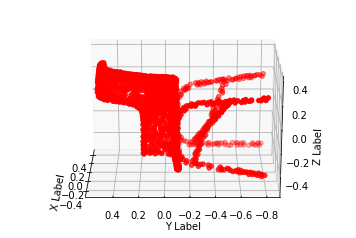

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def get_pts(data):
    return data[12:,0], data[12:,1], data[12:,2] #returns X,Y,Z points skipping the first 12 lines

def plot_ply(infile):
     
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    ax.view_init(20, 180)

    x,y,z = get_pts(infile)
    ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show
    #plt.draw()
    #plt.pause(.001)


print("This is a ", batch_labels[25])
plot_ply(batch_points_ls[25])


This is a  toilet


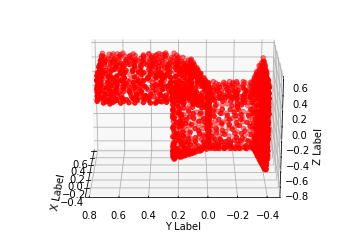

In [22]:
print("This is a ", batch_labels[3])
plot_ply(batch_points_ls[3])